# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "document/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=imperial&appid=" + weather_api_key
test_response = requests.get(url)
#print(test_response, url)

i = 1
city_holder = []
set_count = 1

for city in cities:
    try:
        if i == 50:
            set_count = set_count + 1
            i = 0
        print("Processing Record " + str(i) + " of Set " + str(set_count) + " | " + (city))
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=imperial&appid=" + weather_api_key
        i= i + 1
    
    
        weather_response = requests.get(url)
        test_response = weather_response.json()

        #print(url)

        cloud = test_response["clouds"]["all"]
        country = test_response["sys"]["country"]
        date = test_response["dt"]
        humidity = test_response["main"]["humidity"]
        lat = test_response["coord"]["lat"]
        lng = test_response["coord"]["lon"]
        Max_temp = test_response["main"]["temp_max"]
        Wind_speed = test_response["wind"]["speed"]

        city_holder.append({"City" : city, "Cloudiness" : cloud, "Country": country, 
                            "Date" : date, "Humidity" : humidity, "Lat" : lat, "Lng" : lng, 
                            "Max Temp" : Max_temp, "Wind Speed" : Wind_speed})
        city_holder
    except: 
        print(city + "not found. Skipping...")
        pass
    

Processing Record 1 of Set 1 | amga
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | preston
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | kelme
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | san jeronimo
Processing Record 14 of Set 1 | bandarbeyla
Processing Record 15 of Set 1 | illoqqortoormiut
illoqqortoormiutnot found. Skipping...
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | skalistyy
skalistyynot found. Skipping...
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | itarema
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set

Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | erzin
Processing Record 39 of Set 4 | umzimvubu
umzimvubunot found. Skipping...
Processing Record 40 of Set 4 | krasnoye
Processing Record 41 of Set 4 | nizhneyansk
nizhneyansknot found. Skipping...
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | denia
Processing Record 45 of Set 4 | juigalpa
Processing Record 46 of Set 4 | carutapera
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | dongsheng
Processing Record 0 of Set 5 | tuatapere
Processing Record 1 of Set 5 | hobart
Processing Record 2 of Set 5 | havelock
Processing Record 3 of Set 5 | muravlenko
Processing Record 4 of Set 5 | haines junction
Processing Record 5 of Set 5 | samarai
Processing Record 6 of Set 5 | sentyabrskiy
sentyabrskiynot found. Skipping...
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | cusu

Processing Record 24 of Set 8 | caravelas
Processing Record 25 of Set 8 | loreto
Processing Record 26 of Set 8 | bereznik
Processing Record 27 of Set 8 | bolungarvik
bolungarviknot found. Skipping...
Processing Record 28 of Set 8 | tromso
Processing Record 29 of Set 8 | north myrtle beach
Processing Record 30 of Set 8 | ust-kamchatsk
ust-kamchatsknot found. Skipping...
Processing Record 31 of Set 8 | neuquen
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | mogadishu
Processing Record 34 of Set 8 | pontiac
Processing Record 35 of Set 8 | fort morgan
Processing Record 36 of Set 8 | dawei
Processing Record 37 of Set 8 | toora-khem
Processing Record 38 of Set 8 | berezniki
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | port blair
Processing Record 41 of Set 8 | shitkino
Processing Record 42 of Set 8 | puerto leguizamo
Processing Record 43 of Set 8 | vaitupu
vaitupunot found. Skipping...
Processing Record 44 of Set 8 | omsukchan
Processing 

Processing Record 11 of Set 12 | mordovo
Processing Record 12 of Set 12 | sibolga
Processing Record 13 of Set 12 | charters towers
Processing Record 14 of Set 12 | puerto madryn
Processing Record 15 of Set 12 | chongwe
Processing Record 16 of Set 12 | teresina
Processing Record 17 of Set 12 | kungurtug
Processing Record 18 of Set 12 | taksimo
Processing Record 19 of Set 12 | vresina
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | hoquiam
Processing Record 22 of Set 12 | broken hill
Processing Record 23 of Set 12 | mantua
Processing Record 24 of Set 12 | ust-bolsheretsk
ust-bolsheretsknot found. Skipping...
Processing Record 25 of Set 12 | dibulla
Processing Record 26 of Set 12 | bonthe
Processing Record 27 of Set 12 | marzuq
Processing Record 28 of Set 12 | luderitz
Processing Record 29 of Set 12 | edea
Processing Record 30 of Set 12 | imbituba
Processing Record 31 of Set 12 | nemuro
Processing Record 32 of Set 12 | bandar-e lengeh
Processing Record

In [4]:
#city_holder

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
test_city = pd.DataFrame(city_holder)
test_city.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,amga,97,RU,1586736641,90,60.90,131.96,28.96,8.61
1,rikitea,45,PF,1586736641,78,-23.12,-134.97,77.95,17.87
2,hilo,1,US,1586736642,65,19.73,-155.09,82.40,11.41
3,tasiilaq,100,GL,1586736642,97,65.61,-37.64,32.00,40.26
4,mataura,73,NZ,1586736643,88,-46.19,168.86,42.01,8.99
5,preston,100,GB,1586736643,87,53.77,-2.72,46.99,17.22
6,upernavik,100,GL,1586736644,98,72.79,-56.15,29.53,5.28
7,jamestown,90,US,1586736644,38,42.10,-79.24,60.80,10.29
8,bredasdorp,2,ZA,1586736644,76,-34.53,20.04,53.60,85.23
9,kelme,95,LT,1586736645,46,55.63,22.93,50.00,12.75


In [6]:
test_city.to_csv("RandomCities.csv")

In [7]:
from datetime import datetime
date = datetime.date(datetime.now())
print(date)

2020-04-12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

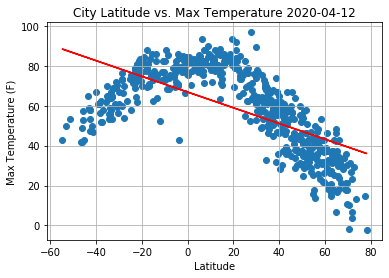

In [8]:
# t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(latitude, temp)
# t_fit = t_slope * latitude + t_int
#line_equation_t = "y = " + str(t_slope) + "x +" + str(t_int)


latitude = test_city.iloc[:,5]
temp = test_city.iloc[:,7]
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(latitude, temp)
t_fit = t_slope * latitude + t_int
plt.scatter(latitude, temp)
plt.plot(latitude,t_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

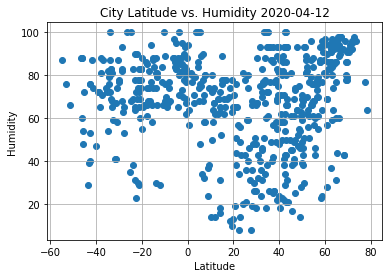

In [9]:
latitude = test_city.iloc[:,5]
humidity = test_city.iloc[:,4]
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

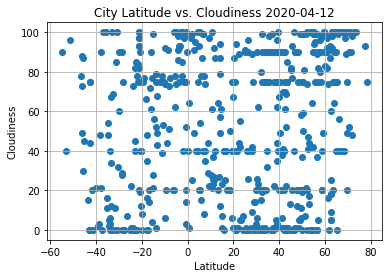

In [10]:
latitude = test_city.iloc[:,5]
cloudiness = test_city.iloc[:,1]
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

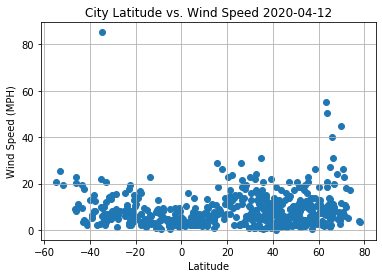

In [11]:
latitude = test_city.iloc[:,5]
wind_speed = test_city.iloc[:,8]
plt.scatter(latitude, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"City Latitude vs. Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames

#north(greater than or equal to 0 degrees latitude)
northern_hem = test_city.loc[(test_city["Lat"]>=0)]
northern_hem


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,amga,97,RU,1586736641,90,60.90,131.96,28.96,8.61
2,hilo,1,US,1586736642,65,19.73,-155.09,82.40,11.41
3,tasiilaq,100,GL,1586736642,97,65.61,-37.64,32.00,40.26
5,preston,100,GB,1586736643,87,53.77,-2.72,46.99,17.22
6,upernavik,100,GL,1586736644,98,72.79,-56.15,29.53,5.28
...,...,...,...,...,...,...,...,...,...
553,bellinge,100,DK,1586737023,68,55.34,10.32,42.80,23.04
554,excelsior springs,100,US,1586737024,75,39.34,-94.23,36.00,21.92
556,farah,99,AF,1586737030,46,32.50,62.50,63.88,8.72
558,guasdualito,40,VE,1586737040,58,7.24,-70.73,87.80,6.93


In [14]:
southern_hem = test_city.loc[(test_city["Lat"]<0)]
southern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,rikitea,45,PF,1586736641,78,-23.12,-134.97,77.95,17.87
4,mataura,73,NZ,1586736643,88,-46.19,168.86,42.01,8.99
8,bredasdorp,2,ZA,1586736644,76,-34.53,20.04,53.60,85.23
12,san jeronimo,75,PE,1586736646,29,-11.95,-75.28,52.27,2.84
14,avarua,97,CK,1586736648,83,-21.21,-159.78,82.40,3.36
...,...,...,...,...,...,...,...,...,...
544,ambanja,52,MG,1586737019,81,-13.68,48.45,75.97,3.83
549,batemans bay,100,AU,1586737021,74,-35.72,150.18,62.01,2.66
555,belmonte,90,BR,1586737025,94,-15.86,-38.88,75.20,4.70
557,kokopo,86,PG,1586737039,65,-4.35,152.26,85.87,4.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

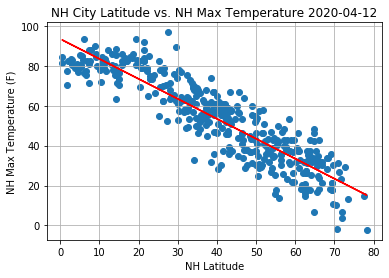

In [15]:
n_latitude = northern_hem.iloc[:,5]
n_temp = northern_hem.iloc[:,7]
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(n_latitude, n_temp)
nt_fit = nt_slope * n_latitude + nt_int
plt.scatter(n_latitude, n_temp)
plt.plot(n_latitude,nt_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('NH Latitude')
plt.ylabel('NH Max Temperature (F)')
plt.title("NH City Latitude vs. NH Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("NH City Latitude vs NH Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

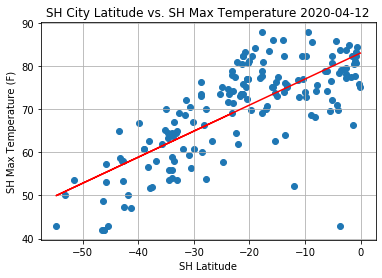

In [16]:
s_latitude = southern_hem.iloc[:,5]
s_temp = southern_hem.iloc[:,7]
st_slope, st_int, st_r, st_p, st_std_err = stats.linregress(s_latitude, s_temp)
st_fit = st_slope * s_latitude + st_int
plt.scatter(s_latitude, s_temp)
plt.plot(s_latitude,st_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('SH Latitude')
plt.ylabel('SH Max Temperature (F)')
plt.title("SH City Latitude vs. SH Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("SH City Latitude vs SH Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

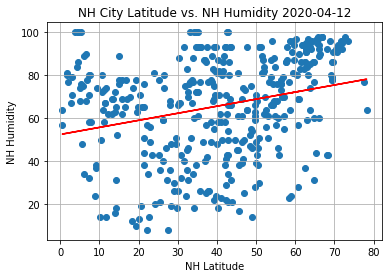

In [17]:
n_latitude = northern_hem.iloc[:,5]
n_humidity = northern_hem.iloc[:,4]
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(n_latitude, n_humidity)
nh_fit = nh_slope * n_latitude + nh_int
plt.scatter(n_latitude, n_humidity)
plt.plot(n_latitude,nh_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Humidity')
plt.title("NH City Latitude vs. NH Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

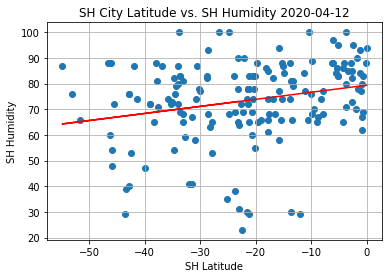

In [18]:
s_latitude = southern_hem.iloc[:,5]
s_humidity = southern_hem.iloc[:,4]
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(s_latitude, s_humidity)
sh_fit = sh_slope * s_latitude + sh_int
plt.scatter(s_latitude, s_humidity)
plt.plot(s_latitude,sh_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Humidity')
plt.title("SH City Latitude vs. SH Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

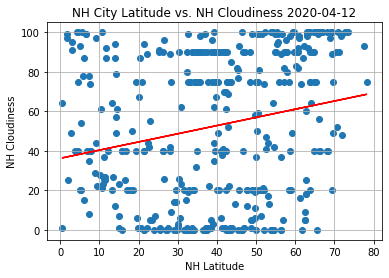

In [19]:
n_latitude = northern_hem.iloc[:,5]
n_cloudiness = northern_hem.iloc[:,1]
nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(n_latitude, n_cloudiness)
nc_fit = nc_slope * n_latitude + nc_int
plt.scatter(n_latitude, n_cloudiness)
plt.plot(n_latitude,nc_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Cloudiness')
plt.title(f"NH City Latitude vs. NH Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

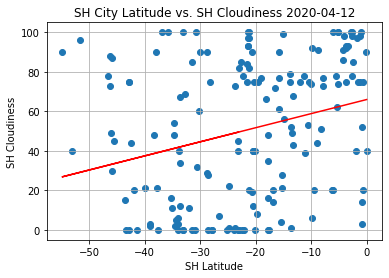

In [20]:
s_latitude = southern_hem.iloc[:,5]
s_cloudiness = southern_hem.iloc[:,1]
sc_slope, sc_int, sc_r, sc_p, sc_std_err = stats.linregress(s_latitude, s_cloudiness)
sc_fit = sc_slope * s_latitude + sc_int
plt.scatter(s_latitude, s_cloudiness)
plt.plot(s_latitude,sc_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Cloudiness')
plt.title(f"SH City Latitude vs. SH Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

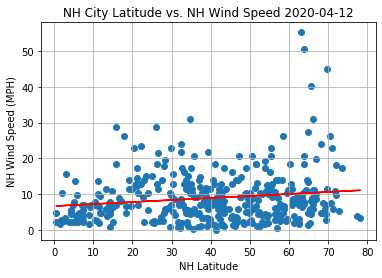

In [21]:
n_latitude = northern_hem.iloc[:,5]
n_wind_speed = northern_hem.iloc[:,8]
nw_slope, nw_int, nw_r, nw_p, nw_std_err = stats.linregress(n_latitude, n_wind_speed)
nw_fit = nw_slope * n_latitude + nw_int
plt.scatter(n_latitude, n_wind_speed)
plt.plot(n_latitude,nw_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Wind Speed (MPH)')
plt.title(f"NH City Latitude vs. NH Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

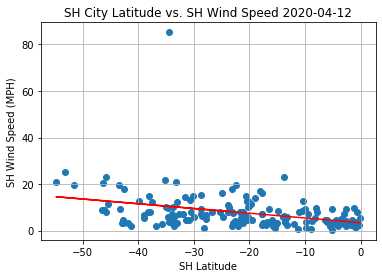

In [22]:
s_latitude = southern_hem.iloc[:,5]
s_wind_speed = southern_hem.iloc[:,8]
sw_slope, sw_int, sw_r, sw_p, sw_std_err = stats.linregress(s_latitude, s_wind_speed)
sw_fit = sw_slope * s_latitude + sw_int
plt.scatter(s_latitude, s_wind_speed)
plt.plot(s_latitude,sw_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Wind Speed (MPH)')
plt.title(f"SH City Latitude vs. SH Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Wind Speed.png")
plt.show()

## Observation:
1. Based on the data we can see that cities closer to the equator tend to have warmer temperatures than cities near    the northern, and southern poles.
2. Our random sample generated more cities in the northern hemisphere than the southern hemisphere, perhaps there      is data to prove that the northern hemisphere is more populated than the southern hemisphere.
3. The Wind Speed in the northern hemispheres is more uniform than Wind Speed in the southern hemisphere. 